#### José Randson da Cunha
#### jrandson@gmail.com
#### (11) 99921-7825

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_points.txt', sep='\t')
del df['Unnamed: 0']
print(df.shape)
df.head()

(10000, 4)


,x,y,z,label
0,326.488285,188.988808,-312.205307,0.0
1,-314.287214,307.276723,-179.037412,1.0
2,-328.208910,181.627758,446.311062,1.0
3,-148.658890,147.027947,-27.477959,1.0
4,-467.065931,250.467651,-306.475330,1.0


In [3]:
#As we can see the dataset is reasonble balanced

label_1 = df[df['label'] == 1].shape[0]
label_0 = df[df['label'] == 0].shape[0]

print("Num lables equal to 0: {}".format(label_0))
print("Num lables equal to 1: {}".format(label_1))


Num lables equal to 0: 4973
Num lables equal to 1: 5027


As we are now considering to work with neural network, is recomenended we do a reescale on the dataset,so all features will remain between zero and one.

In [15]:
df_X = df[df.columns[:-1]]
df_X = (df_X - df_X.min())/(df_X.max() - df_X.min())
print(df_X.head())
print(df_X.max())
print(df_X.min())

          x         y         z
0  0.826559  0.689128  0.187780
1  0.185575  0.807457  0.320971
2  0.171649  0.681764  0.946429
3  0.351258  0.647153  0.472557
4  0.032747  0.750628  0.193511
x    1.0
y    1.0
z    1.0
dtype: float64
x    0.0
y    0.0
z    0.0
dtype: float64


In [16]:
#Extracting the feature and lables into the variables

X = df_X.values
print(X.shape)
print(X[:10])

y = df[df.columns[-1]].values
print(y.shape)
print(y[:10])


(10000, 3)
[[0.82655943 0.68912807 0.18778014]
 [0.18557548 0.80745721 0.32097136]
 [0.17164926 0.68176445 0.94642935]
 [0.35125769 0.64715258 0.47255736]
 [0.03274707 0.75062834 0.19351112]
 [0.47609319 0.45597345 0.22319537]
 [0.50362694 0.24738536 0.05491812]
 [0.9055033  0.62485146 0.98244228]
 [0.03193553 0.45103425 0.15992448]
 [0.8435344  0.64303363 0.51060511]]
(10000,)
[0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [7]:
# spliting the dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print("{} samples for training".format(X_train.shape[0]))
print("{} samples for testing".format(X_test.shape[0]))

7000 samples for training
3000 samples for testing


Now we are creating our model. Empiracaly, it was found that the best hyperparam thar maximize the performance of our neural model is the solver as being lbfgs algorithm, the activation function of the neurons as the relu function and just two hidden layer with twelve and nine neurons, respectivaly.

In [27]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='lbfgs', 
                          activation='relu', 
                          alpha=1e-5, 
                          hidden_layer_sizes=(12,9),
                          random_state=1)

mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

The metrics are computed as bellow

In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y_pred = mlp_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: {}".format(acc))
print("Precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1 score: {}".format(f1))


Accuracy: 0.7623333333333333
Precision: 0.7539473684210526
recall: 0.7717171717171717
f1 score: 0.762728785357737


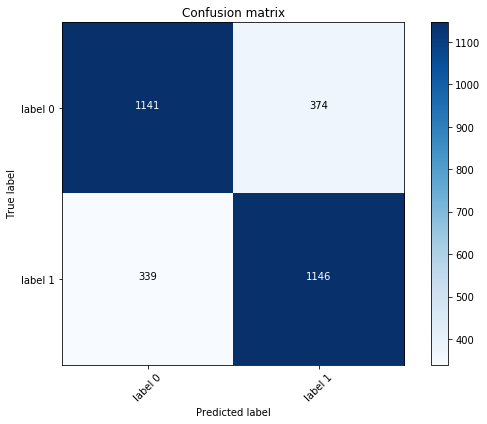

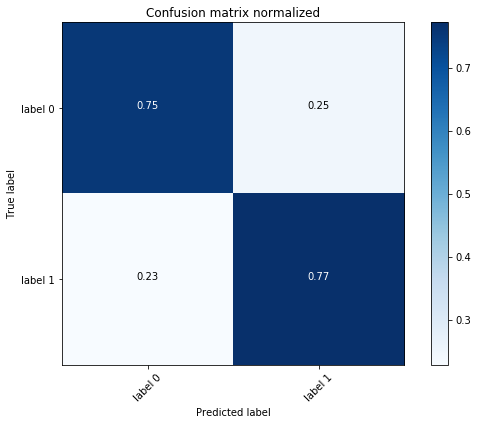

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,6))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

classes = ['label 0', 'label 1']

cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)


plot_confusion_matrix(cnf_matrix, classes, normalize=True,
                          title='Confusion matrix normalized',
                          cmap=plt.cm.Blues)

plt.show()

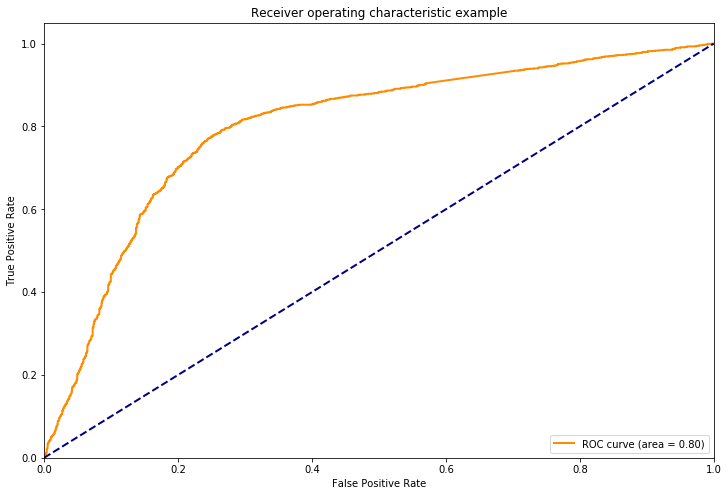

In [30]:
import numpy as np
from sklearn.metrics import roc_curve, auc


y_score = mlp_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

As we can see about the metric computed above, we can conclude the our neural model could be able generalize 
much better our linear model. All the metrics used showed good performance.
the Accuracy ascore : 0.76, precision: 0.75, recall: 0.77 and f1 score: 0.76 were higher compared with the logistic regression model. Our confusion Matrix has dominant diagonal principal, which indicates our model was able to generalize well and the ROC curve of the model is quiet further from the random line. That means these model predictions had a good taxe of assertiviness.

This better performace can be explainned by the great capacity of neural network to learn non-lienar patterns.